In [1]:
# Setting up imports
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.table import Table
from astropy import wcs
from astropy.coordinates import SkyCoord
import astropy.units as u

import cv2
import glob
from detectron2.structures import BoxMode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

/home/yse2/.conda/envs/deepdisc/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Opening the FITS files for one RA and DEC
# Original Image File
dc2_img_50_neg42 = fits.open('roman_data/original_fits/dc2_F184_50.93_-42.0.fits')
img_data = dc2_img_50_neg42[1].data
w = wcs.WCS(dc2_img_50_neg42[1].header)

h158_50_neg42 = fits.open('roman_data/original_fits/dc2_H158_50.93_-42.0.fits')
h158_img_data = h158_50_neg42[1].data

y106_50_neg42 = fits.open('roman_data/original_fits/dc2_Y106_50.93_-42.0.fits')
y106_img_data = y106_50_neg42[1].data

j129_50_neg42 = fits.open('roman_data/original_fits/dc2_J129_50.93_-42.0.fits')
j129_img_data = j129_50_neg42[1].data
# Combine all data from all 4 filters into big image
full_50_neg42_data = np.stack((img_data, h158_img_data, y106_img_data, j129_img_data)) 
# np.save('full_50_neg42_data.npy', full_50_neg42_data)

# Detection File
dc2_det_50_neg42 = fits.open('roman_data/dc2_det_50.93_-42.0.fits.gz')
det_50_neg42 = Table.read(dc2_det_50_neg42,hdu=1).to_pandas()
# Segmentation File
dc2_seg_50_neg42 = fits.open('roman_data/dc2_seg_50.93_-42.0.fits.gz')
# Truth Files
dc2_truth_50_neg42 = fits.open('roman_data/dc2_index_50.93_-42.0.fits.gz') # specific region catalog
truth_50_neg42 = Table.read(dc2_truth_50_neg42,hdu=1).to_pandas()
# index_list = fits.open('roman_data/dc2_index.fits') # full catalog
# full_index = Table.read(index_list,hdu=1).to_pandas()

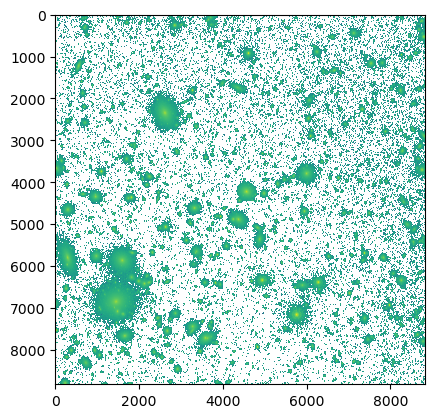

In [3]:
plt.imshow(full_50_neg42_data[3],norm=colors.LogNorm())

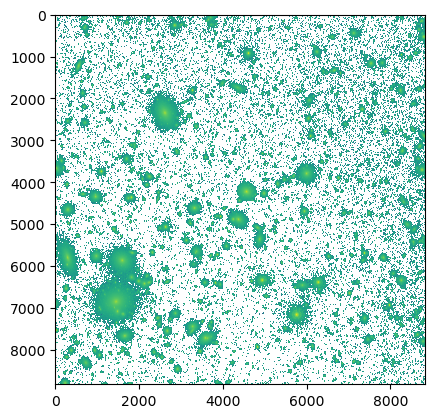

In [4]:
plt.imshow(j129_img_data,norm=colors.LogNorm())

In [50]:
det_50_neg42

number     flux_auto  fluxerr_auto   mag_auto  magerr_auto  \
0           1  1.177696e+06    687.900391  16.622417     0.000634   
1           2  7.229053e+04    181.497574  19.652296     0.002727   
2           3  4.772592e+05    438.940063  17.603113     0.000999   
3           4  8.700845e+04    212.187744  19.451096     0.002648   
4           5  6.689763e+04    191.658432  19.736473     0.003111   
...       ...           ...           ...        ...          ...   
18904   18905  4.048349e+02     21.786587  25.281805     0.058444   
18905   18906  1.374280e+02     11.977407  26.454811     0.094649   
18906   18907  5.012572e+02     21.186554  25.049849     0.045902   
18907   18908  5.901863e+01      9.798265  27.372526     0.180298   
18908   18909  1.385926e+02     12.163317  26.445648     0.095311   

       kron_radius  background  isoareaf_image   xwin_image   ywin_image  ...  \
0         3.500000    0.494097            8740  2859.158419   267.783215  ...   
1         3.500000    0.056077            3849  1715.399330   201.715260  ...   
2         3.500000    0.275727            5079  8752.777517   162.313415  ...   
3         3.788014    0.559069            5109  3660.745509   132.340323  ...   
4         4.126009    0.570003            5036  3714.950267    82.453016  ...   
...            ...         ...             ...          ...          ...  ...   
18904     7.539539   -0.031011              26  6142.699763  7868.654827  ...   
18905     8.540367   -0.230008               6   867.710728  8606.560422  ...   
18906     4.922741   -0.139580              59  7853.342740  8432.889805  ...   
18907     8.166246   -0.263266               5    34.020794  7867.444292  ...   
18908     8.709740    0.130945               6   532.284901  7841.331960  ...   

       xywin_world_Y106  x2win_world_J129  y2win_world_J129  xywin_world_J129  \
0         -2.587140e-11      6.978443e-10      6.816667e-10     -2.428648e-11   
1         -6.954410e-11      3.839639e-09      3.875417e-09     -9.106867e-11   
2         -1.142805e-11      3.939752e-10      3.681887e-10     -1.599902e-11   
3          1.197188e-09      1.132948e-08      1.246096e-08      1.104630e-09   
4         -8.132858e-11      1.442518e-08      1.397542e-08     -1.099098e-10   
...                 ...               ...               ...               ...   
18904      4.854367e-12      6.438247e-10      3.148176e-10      4.854367e-12   
18905     -1.797260e-12      3.536745e-09      1.911792e-09      1.379255e-10   
18906     -3.800111e-12      5.020995e-10      4.700652e-10      2.640269e-11   
18907     -1.209151e-10      9.013238e-10      3.553480e-10     -1.799696e-12   
18908     -2.060634e-10      1.652729e-10      6.374416e-11     -9.445064e-14   

       x2win_world_H158  y2win_world_H158  xywin_world_H158  x2win_world_F184  \
0          7.128677e-10      7.062501e-10     -1.200881e-11      5.050673e-10   
1          4.005206e-09      4.050738e-09     -8.204198e-11      4.447823e-09   
2          3.456031e-10      3.864906e-10     -2.166978e-11      4.436016e-10   
3          1.271853e-08      1.408386e-08      1.412910e-09      1.286914e-08   
4          1.422177e-08      1.403196e-08     -1.546007e-10      1.463919e-08   
...                 ...               ...               ...               ...   
18904      4.811985e-09      4.070602e-09     -8.437587e-10      6.438247e-10   
18905      2.604739e-09      1.139977e-09     -2.081109e-10      6.968123e-10   
18906      8.096196e-10      7.731009e-10      5.219393e-11      9.890375e-10   
18907      1.547216e-10      1.594247e-10      3.640059e-11      1.759329e-10   
18908      1.398689e-09      1.763358e-09     -6.482456e-11      1.652729e-10   

       y2win_world_F184  xywin_world_F184  
0          5.179074e-10      9.277269e-12  
1          4.539538e-09     -8.909127e-11  
2          4.550209e-10      5.139546e-13  
3          1.419579e-08      1.390587e-09  
4          1.447797e-08     -1.818288e-

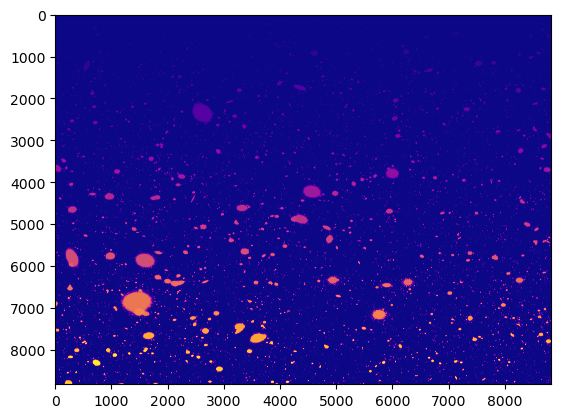

In [5]:
plt.imshow(dc2_seg_50_neg42[0].data, cmap='plasma', aspect='auto')

In [4]:
truth_50_neg42.head()

ind  sca  dither            x            y         ra        dec  \
0  1105    1  133533  5303.765149  4232.531421  50.910871 -42.072023   
1  1699    2  133533  1477.293092  6696.015749  50.993167 -42.032660   
2  1711    1  133533  5490.333289  5793.144849  50.906866 -42.047096   
3  1739    1  133533  8273.020556  1734.963488  50.846929 -42.111886   
4  5422    2  133533   688.422146  1923.390766  51.010227 -42.108879   

    mag_Y106   mag_J129   mag_H158   mag_F184  stamp  start_row  gal_star  \
0  24.006267  24.165531  24.370946  24.618133      0          0         1   
1  26.618841  26.631427  26.745135  26.938484      0          0         1   
2  25.185924  25.229561  25.480311  25.761320      0          0         1   
3  23.851875  23.960805  24.117537  24.331119      0          0         1   
4  26.958768  27.026278  27.173446  27.373444      0          0         1   

   dered_Y106  dered_J129  dered_H158  dered_F184  
0   -0.031772   -0.023253   -0.016889   -0.013073  
1   -0.043219   -0.031635   -0.022980   -0.017744  
2   -0.002874   -0.002120   -0.001584    0.000000  
3    0.000000    0.000000    0.000000    0.000000  
4   -0.159082   -0.115909   -0.084452   -0.065285

## Cutout Region in 50.93 -42 with 512 pixels

### Making One Cutout

In [225]:
pos = [0,9000]
cutout_size = 512
# cutout = Cutout2D(imdat, position=c, size=512, wcs=w) not possible as we don't have raw image data
# partial and set fill_value to zero since we ignore it anyway
seg_cutout = Cutout2D(dc2_seg_50_neg42[0].data, position=pos, size=cutout_size, wcs=w, mode='partial', fill_value='0')
seg_img_cut = seg_cutout.data

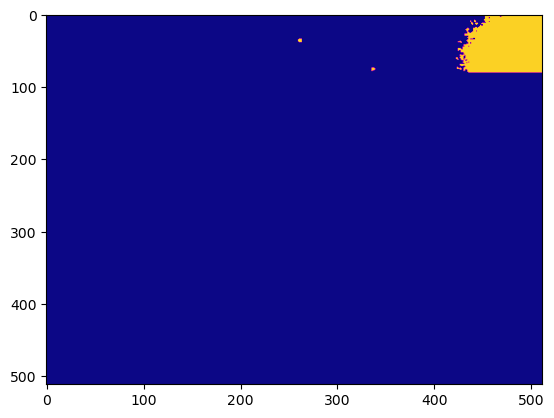

In [226]:
plt.imshow(seg_img_cut, cmap='plasma', aspect='auto')

### Making N Cutouts that cover whole image

In [12]:
# num_cutouts = 100
cutout_size = 512
# cutouts_pa = int(np.sqrt(num_cutouts)) # pa - per axis
# find step size
x_steps = np.arange(0, dc2_seg_50_neg42[0].data.shape[1], cutout_size)
y_steps = np.arange(0, dc2_seg_50_neg42[0].data.shape[0], cutout_size)
# Finding the actual cutouts
seg_cutouts = []
raw_cutouts = []
for y in y_steps:
    for x in x_steps:
        # partial mode and set fill_value to zero since we will ignore it anyway
        seg_cutout = Cutout2D(dc2_seg_50_neg42[0].data, position=(x + cutout_size/2, y + cutout_size/2), size=cutout_size, wcs=w, mode='partial', fill_value=0)
        raw_cutout_f184 = Cutout2D(img_data, position=(x + cutout_size/2, y + cutout_size/2), size=cutout_size, wcs=w, mode='partial', fill_value=0)
#         raw_cutout_h158 = Cutout2D(h158_img_data, position=(x + cutout_size/2, y + cutout_size/2), size=cutout_size, wcs=w, mode='partial', fill_value=0)
#         raw_cutout_j129 = Cutout2D(j129_img_data, position=(x + cutout_size/2, y + cutout_size/2), size=cutout_size, wcs=w, mode='partial', fill_value=0)
#         raw_cutout_y106 = Cutout2D(y106_img_data, position=(x + cutout_size/2, y + cutout_size/2), size=cutout_size, wcs=w, mode='partial', fill_value=0)
        seg_cutouts.append(seg_cutout) # seg_cutout.wcs() is what we shld preserve
        raw_cutouts.append(raw_cutout_f184)

### Plotting Cutouts on Image

Generated 324 cutouts


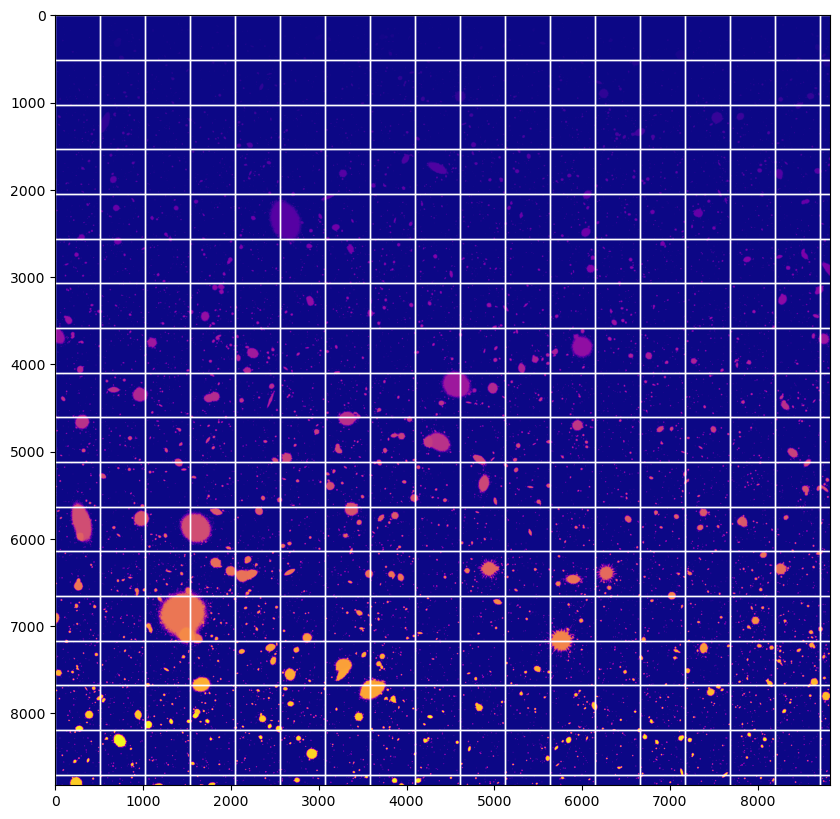

In [16]:
fig, axes = plt.subplots(figsize=(10, 10))
axes.imshow(dc2_seg_50_neg42[0].data, cmap='plasma', aspect='auto')
for seg_cutout in seg_cutouts:
    seg_cutout.plot_on_original(color='white')
print(f"Generated {len(seg_cutouts)} cutouts")

### Plotting a few of the cutouts themselves

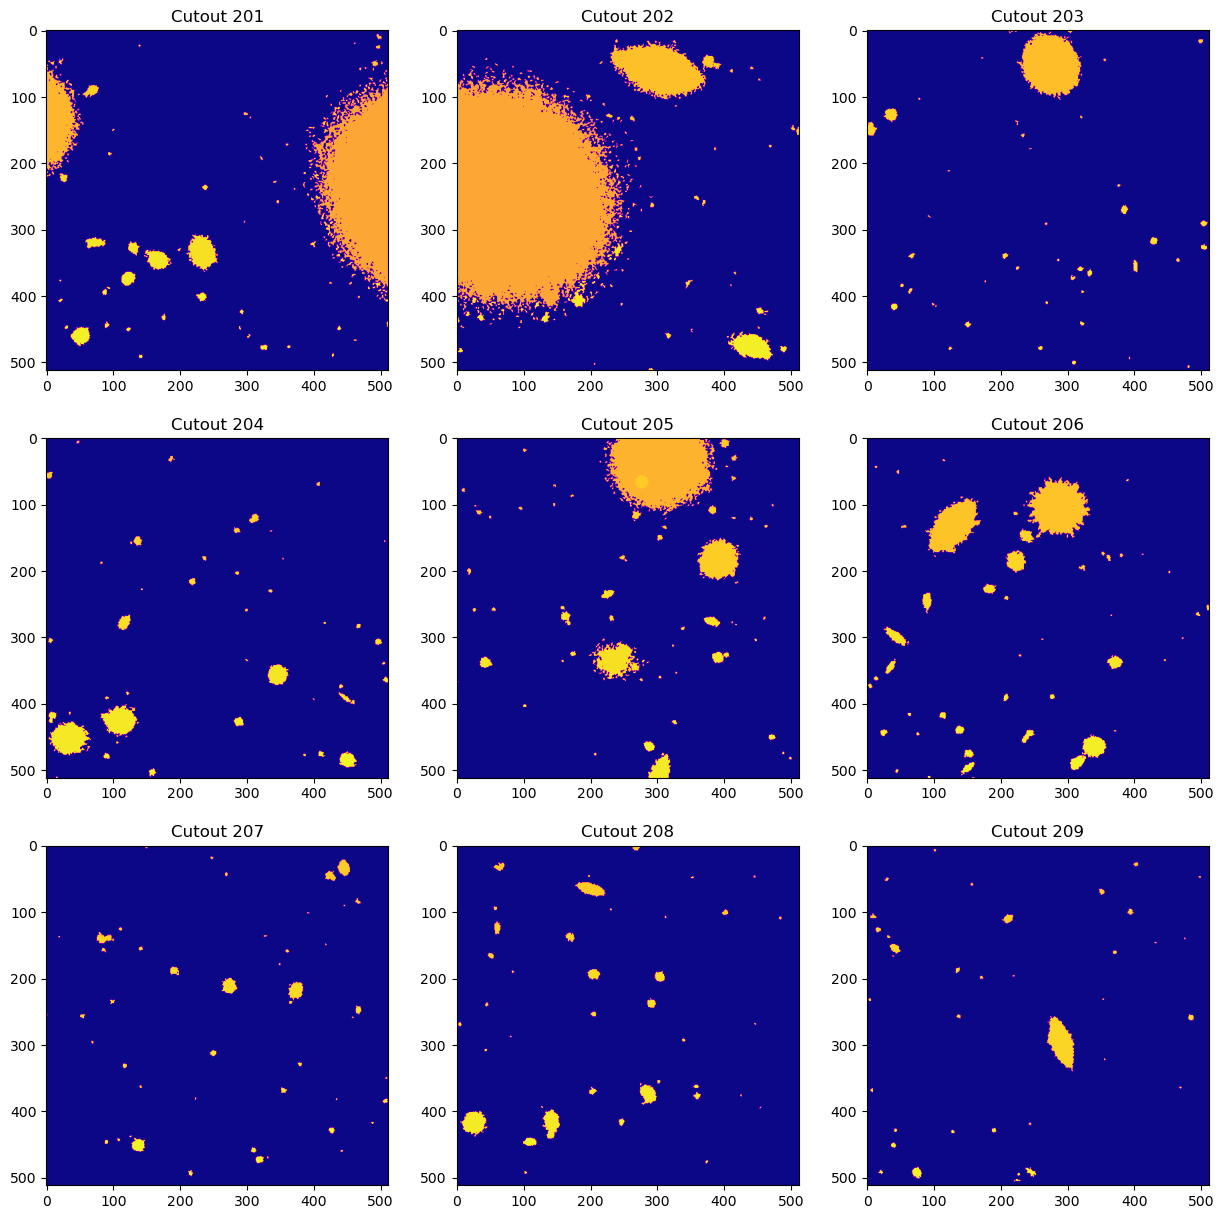

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
# First 10 Cutouts
# for i, seg_cutout in enumerate(seg_cutouts):
#     if i > 8:
#         break
#     axes[i].imshow(seg_cutout.data, cmap='plasma', aspect='auto')
#     axes[i].set_title(f'Cutout {i+1}')

# Middle Cutouts
demo_cutouts_mid = seg_cutouts[200:209]
for i, seg_cutout in enumerate(demo_cutouts_mid):
    axes[i].imshow(seg_cutout.data, cmap='plasma', aspect='auto')
    axes[i].set_title(f'Cutout {200+i+1}')

# # # Last 10 Cutouts
# demo_cutouts = seg_cutouts[315:]
# for i, seg_cutout in enumerate(demo_cutouts):
#     axes[i].imshow(seg_cutout.data, cmap='plasma', aspect='auto')
#     axes[i].set_title(f'Cutout {i+1}')

### Plotting Raw Img and Segmap Cutout

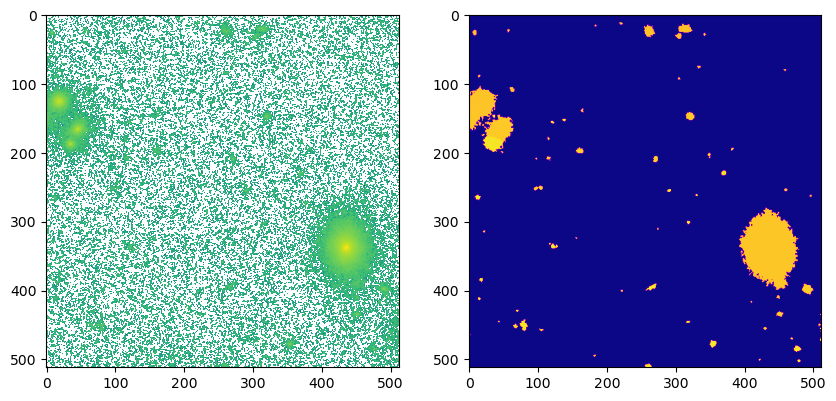

In [13]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
raw_img_cutout = raw_cutouts[271].data
seg_img_cutout = seg_cutouts[271].data
ax[0].imshow(raw_img_cutout,norm=colors.LogNorm())
ax[1].imshow(seg_img_cutout, cmap='plasma')

## Cross Matching Every Detected Object in Cutouts of 50.93, -42 

### Single Cutout

In [ ]:
seg_objs = []
for s in np.unique(seg_img_cut):
    if s == 0: # background which we don't care about
        continue
    seg_objs.append(s)
seg_objs = np.asarray(seg_objs)

# Grabbing the DECs and RAs of the detected objs in this cutout
det_objs = det_50_neg42.iloc[seg_objs]
ras = det_objs['alphawin_j2000'].values
decs = det_objs['deltawin_j2000'].values

det_SkyCoords = SkyCoord(ra=ras*u.degree, dec=decs*u.degree)
truth_coords = SkyCoord(ra=truth_50_neg42['ra'].values*u.degree, dec=truth_50_neg42['dec'].values*u.degree)
# Enforcing a separation constraint matched 
# so we get sources in det and truth that are separated by less than 1 degree
max_sep = 1.0 * u.degree
idx_cutout, d2d, d3d = det_SkyCoords.match_to_catalog_sky(truth_coords)
sep_constraint = d2d < max_sep
det_matches = det_SkyCoords[sep_constraint]
truth_matches = truth_coords[idx_cutout[sep_constraint]]

# In the above case, every single idx in idx_cutout got selected since they passed the constraint
# so we can use idx_cutout as is. But generally, use idx_cutout[sep_constraint] to get truth info
# about objects
matches2 = truth_50_neg42.loc[idx_cutout[sep_constraint]]
matches2

In [42]:
truth_coords = SkyCoord(ra=truth_50_neg42['ra'].values*u.arcsecond, dec=truth_50_neg42['dec'].values*u.arcsecond)
truth_50_neg42['ra'].values*u.arcsecond, truth_50_neg42['dec'].values*u.arcsecond

(<Quantity [50.9108713 , 50.9931668 , 50.906866  , ..., 50.88679624,
            50.85350314, 50.8470883 ] arcsec>,
 <Quantity [-42.0720229 , -42.0326599 , -42.0470957 , ..., -42.11083656,
            -42.11874223, -42.0748445 ] arcsec>)

### Multiple Cutouts

In [21]:
all_matched_objs_info = []
all_metadata = []
for imgid, seg_cutout in enumerate(seg_cutouts):
    # Getting All Unique Objects in Segmap Cutout
    seg_objs = []
    seg_img_cut = seg_cutout.data
    for s in np.unique(seg_img_cut):
        if s == 0: # background which we don't care about
            continue
        seg_objs.append(s)
    seg_objs = np.asarray(seg_objs)
    # Grabbing the DECs and RAs of the unique objs in this cutout
    det_objs = det_50_neg42.iloc[seg_objs-1] # -1 because we match these objs with the number col NOT index 
    ras = det_objs['alphawin_j2000'].values
    decs = det_objs['deltawin_j2000'].values
    det_SkyCoords = SkyCoord(ra=ras*u.degree, dec=decs*u.degree)
    truth_coords = SkyCoord(ra=truth_50_neg42['ra'].values*u.degree, dec=truth_50_neg42['dec'].values*u.degree)
    # print(det_SkyCoords, "True:", truth_coords)
    # Enforcing a separation constraint matched so we get sources in det and truth that are separated by less than .0575"
    max_sep = 0.0575 * u.arcsec # same as coadd pixel scale from https://academic.oup.com/mnras/article/522/2/2801/7076879?login=false
    idx_cutout, d2d, d3d = det_SkyCoords.match_to_catalog_sky(truth_coords)
    sep_constraint = d2d < max_sep
    det_matches = det_SkyCoords[sep_constraint]
    truth_matches = truth_coords[idx_cutout[sep_constraint]]
#     print(f"Outside If {imgid}: {len(det_matches)}, {len(det_SkyCoords)}") # discard
#     print(f"{len(idx_cutout[sep_constraint])}")
    if len(idx_cutout[sep_constraint]) > 0: # only take cutouts that pass separation constraint
        objects_info = truth_50_neg42.loc[idx_cutout[sep_constraint]].copy()
        # We need to store the wcs info for each cutout so we can find the sky coordinates for a given pixel in the cutout array. 
        # like so: from astropy.wcs.utils import pixel_to_skycoord pixel_to_skycoord(x_cutout, y_cutout, cutout.wcs)
        truth_info = { "image_id": imgid,
                      "wcs": seg_cutout.wcs.to_header_string(),
                      "objects_info": objects_info.to_json(orient='records')
                     }
        all_matched_objs_info.append(truth_info)
        # Formatting Segmaps for DeepDisc
        matched_truths = {} # s : 0 or 1 whether it's a galaxy or star
#         print(f"In Format Segmaps {imgid}: {sep_constraint}, {seg_objs}\n")
        for idx, seg_obj in enumerate(seg_objs):
            # this obj has a separation less than .0575" and thus has a corressponding truth val
            if sep_constraint[idx]:
                matched_truths[seg_obj] = truth_50_neg42.iloc[idx_cutout[idx]]['gal_star']
        # getting metadata for this cutout
        cutout_metadata = get_metadata(seg_img_cut, imgid, matched_truths)
        all_metadata.append(cutout_metadata)

In [22]:
all_matched_objs_info # list of dicts where each dict represents a cutout and all of the info of the objects within that cutout

[{'image_id': 2,
  'wcs': "WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =               3389.0 / Pixel coordinate of reference point            CRPIX2  =               4413.0 / Pixel coordinate of reference point            PC1_1   = -1.5972222222222E-05 / Coordinate transformation matrix element       PC1_2   =  4.2351647362715E-22 / Coordinate transformation matrix element       PC2_1   =  4.2351647362715E-22 / Coordinate transformation matrix element       PC2_2   =  1.5972222222222E-05 / Coordinate transformation matrix element       CDELT1  =                  1.0 / [deg] Coordinate increment at reference point  CDELT2  =                  1.0 / [deg] Coordinate increment at reference point  CUNIT1  = 'deg'                / Units of coordinate increment and value        CUNIT2  = 'deg'                / Units of coordinate increment and value        CTYPE1  = 'RA---TAN'           / Right ascension, gnomonic projection           CTYPE2  = 'DE

In [24]:
# to get all of the objects in cutout ### and their information
cutout_num = 2
objs_data = None
for cutout_info in all_matched_objs_info:
    if cutout_info['image_id'] == cutout_num:
        objs_data = pd.read_json(cutout_info['objects_info'])
objs_data

ind  sca  dither            x           y         ra        dec  \
0  42820415    1  133534  1180.999311  506.844359  50.999647 -42.131511   
1  43221646    1  133534  1338.441539  511.069830  50.996256 -42.131445   

    mag_Y106   mag_J129   mag_H158   mag_F184  stamp  start_row  gal_star  \
0  22.908615  22.708853  22.531427  22.426768    256          0         0   
1  26.402536  26.265229  26.137172  26.045466    128          0         0   

   dered_Y106  dered_J129  dered_H158  dered_F184  
0   -0.303981   -0.221251   -0.153847   -0.119115  
1   -0.358384   -0.282420   -0.206098   -0.159551

In [ ]:
all_metadata[:10]

## Get MetaData Function

In [15]:
def get_metadata(cutout_data, imid, matched_truth):
    d = {}
    annos = []
    for s in np.unique(cutout_data):
        mask = np.zeros(cutout_data.shape)
        if s == 0:
            continue
        s0i = np.where(cutout_data == s)
        mask[s0i] =1

        x0 = s0i[1].min()
        x1 = s0i[1].max()
        y0 = s0i[0].min()
        y1 = s0i[0].max()

        h = int(y1-y0)
        w = int(x1-x0)
        

        contours, hierarchy = cv2.findContours(
                (mask).astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE
            )

        segmentation = []
        for contour in contours:
            # contour = [x1, y1, ..., xn, yn]
            contour = contour.flatten()
            if len(contour) > 4:
                segmentation.append(contour.tolist())
        
        # No valid countors
        if len(segmentation) == 0:
            continue
        
        obj_class = matched_truth.get(s, 2) # 2 if no matching truth
        #use the truth matched indices to get object classes
       
        obj = {
            "bbox": [int(x0), int(y0), w, h],
            "bbox_mode": BoxMode.XYWH_ABS,
            "area": w * h,
            "segmentation": segmentation,
            "category_id": obj_class,
            "obj_id": int(s),
        }
        
        annos.append(obj)

    height, width = mask.shape

    d["annotations"] = annos
    d['height'] = height
    d['width'] = width
    d["image_id"] = imid
    
    return d

In [56]:
# list of dicts with each entry for value with key filename
# FINAL GOAL AFTER CHECKING IT WITH VISUALIZE
# 10-15 big images, get cutouts of image, get image data of the cutout in each band creating a 4x512x512 nd array
# match dictionary to corresponding image
# from deepdisc.data_format.conversions import convert_to_json to save list of dicts to json file for DeepDISC

## Verifying Visualizer Works

Astro_Test already registered!
total instances: 73


Text(0.5, 1.0, 'Ground Truth')

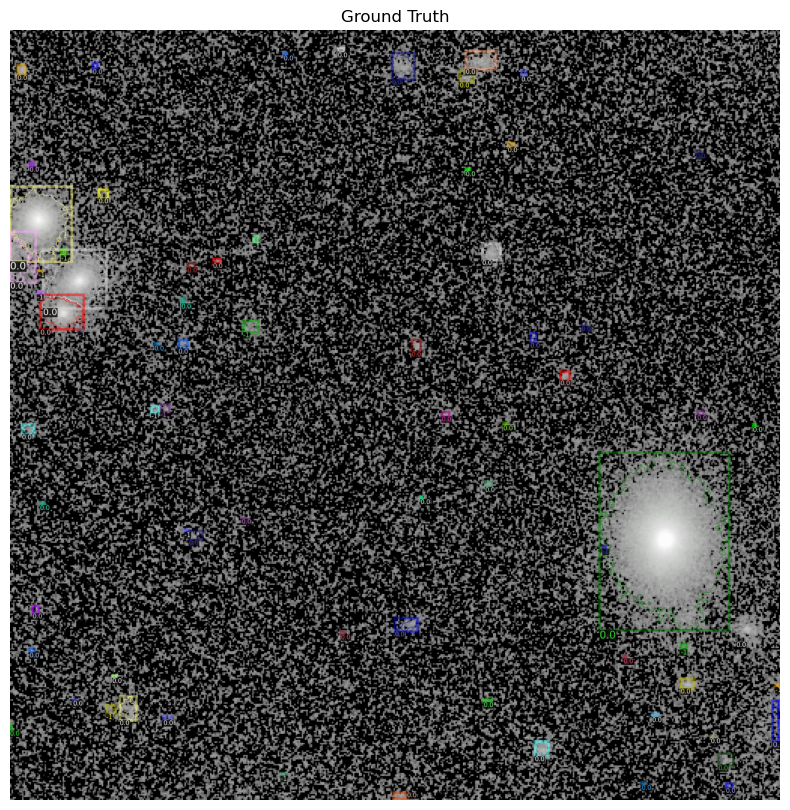

In [27]:
from detectron2.data import MetadataCatalog, DatasetCatalog
#DatasetCatalog.remove("astro_test")
#MetadataCatalog.remove("astro_test")

from deepdisc.data_format.register_data import register_data_set
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

from astropy.visualization import make_lupton_rgb

from deepdisc.astrodet.visualizer import ColorMode

red = np.array(colors.to_rgb('red'))*255
white = np.array(colors.to_rgb('white'))*255
blue = np.array(colors.to_rgb('blue'))*255
green = np.array(colors.to_rgb('green'))*255

try:
    DatasetCatalog.register("astro_test", lambda: get_metadata())
except AssertionError:
    print("Astro_Test already registered!")
    
#astrotest_metadata = MetadataCatalog.get("astro_test").set(thing_classes=["star","galaxy","bad_fit","unknown"]).set(thing_colors=[red,green,white,blue])
#astrotest_metadata = MetadataCatalog.get("astro_test").set(thing_classes=["star","galaxy","bad_fit"]).set(thing_colors=[red,green,white])
#astrotest_metadata = MetadataCatalog.get("astro_test").set(thing_classes=["object"]).set(thing_colors=[white])
#astrotest_metadata = MetadataCatalog.get("astro_test").set(thing_classes=["object"]).set(thing_colors=[green])
astrotest_metadata = MetadataCatalog.get("astro_test")

from deepdisc.astrodet.visualizer import Visualizer
from deepdisc.astrodet.visualizer import ColorMode

for metadata in all_metadata:
    if metadata['image_id'] == 271: #  same as ### Plotting Raw Img and Segmap Cutout
        test_d = metadata
        break

plt.figure(figsize=(10,10))

# Selecting a single raw img cutout (271)
b1 = raw_img_cutout
b2 = raw_img_cutout
b3 = raw_img_cutout
img = make_lupton_rgb(b1, b2, b3, minimum=0, stretch=0.5, Q=10)

print("total instances:", len(test_d["annotations"]))
v0 = Visualizer(
    img,
    metadata=astrotest_metadata,
    scale=5,
    instance_mode=ColorMode.SEGMENTATION,  # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
groundTruth = v0.draw_dataset_dict(test_d, lf=True, alpha=0.01)

ax1 = plt.subplot(1, 1, 1)
ax1.imshow(groundTruth.get_image())
ax1.axis("off")
plt.title('Ground Truth')

## Converting to JSON File for DeepDisc

In [26]:
from deepdisc.data_format.conversions import convert_to_json
output_file = './new_with_none.json'
convert_to_json(all_matched_objs_info, output_file)

Caching COCO format annotations at './new_with_none.json' ...


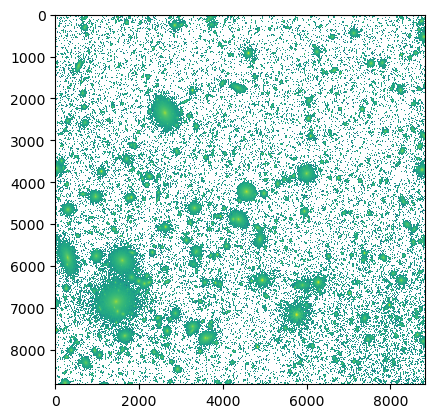

In [32]:
dc2_H158_50_neg42 = fits.open('roman_data/original_fits/dc2_Y106_50.93_-42.0.fits')
h158_data = dc2_H158_50_neg42[1].data
plt.imshow(h158_data,norm=colors.LogNorm())

## Using Script Generated Annotations

Astro_Test already registered!
total instances: 65


ValueError: Input values must have shape (N x 1) or (1).

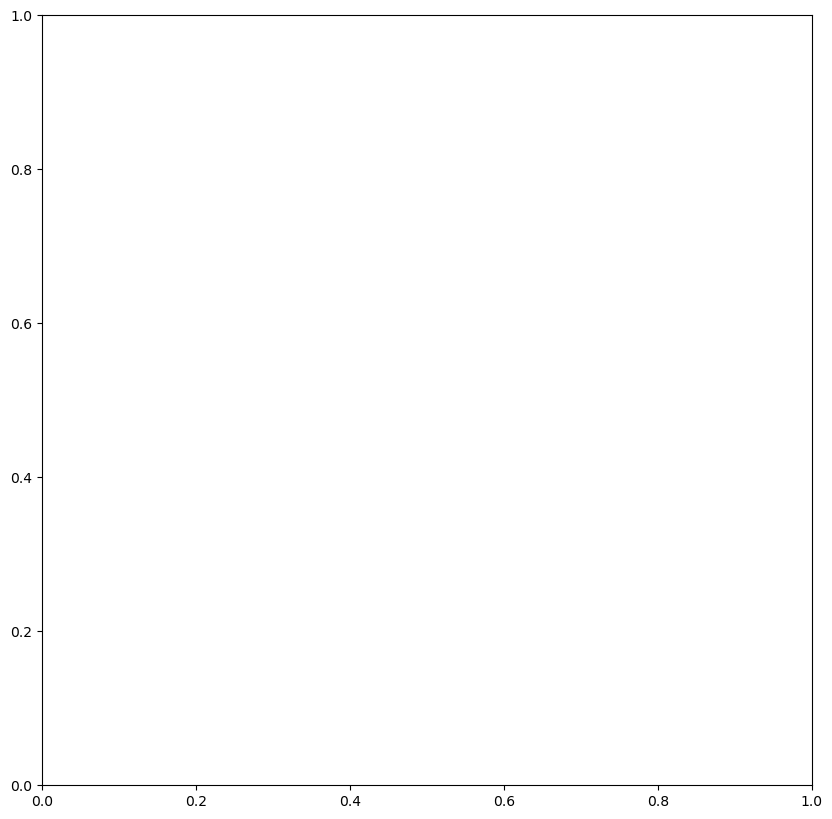

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from detectron2.data import MetadataCatalog, DatasetCatalog
import numpy as np
#DatasetCatalog.remove("astro_test")
#MetadataCatalog.remove("astro_test")

from deepdisc.data_format.register_data import register_data_set
import matplotlib.pyplot as plt
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

from astropy.visualization import make_lupton_rgb

from deepdisc.astrodet.visualizer import ColorMode

red = np.array(colors.to_rgb('red'))*255
white = np.array(colors.to_rgb('white'))*255
blue = np.array(colors.to_rgb('blue'))*255
green = np.array(colors.to_rgb('green'))*255

try:
    DatasetCatalog.register("astro_test", lambda: get_metadata())
except AssertionError:
    print("Astro_Test already registered!")
    
#astrotest_metadata = MetadataCatalog.get("astro_test").set(thing_classes=["star","galaxy","bad_fit","unknown"]).set(thing_colors=[red,green,white,blue])
#astrotest_metadata = MetadataCatalog.get("astro_test").set(thing_classes=["star","galaxy","bad_fit"]).set(thing_colors=[red,green,white])
#astrotest_metadata = MetadataCatalog.get("astro_test").set(thing_classes=["object"]).set(thing_colors=[white])
#astrotest_metadata = MetadataCatalog.get("astro_test").set(thing_classes=["object"]).set(thing_colors=[green])
astrotest_metadata = MetadataCatalog.get("astro_test")

from deepdisc.astrodet.visualizer import Visualizer
from deepdisc.astrodet.visualizer import ColorMode

# test_d = all_metadata[271][271] # same as ### Plotting Raw Img and Segmap Cutout

plt.figure(figsize=(10,10))

# Selecting a single raw img cutout (271)

img_cutout_data = './roman_data/truth/dc2_52.93_-40.8/full_c127_52.93_-40.8.npy'
b1 = np.load(img_cutout_data)[3]
b2 = np.load(img_cutout_data)[1]
b3 = np.load(img_cutout_data)[2]
img = make_lupton_rgb(b1, b2, b3, minimum=0, stretch=0.5, Q=10)

print("total instances:", len(data[2]["annotations"]))
v0 = Visualizer(
    img,
    metadata=astrotest_metadata,
    scale=5,
    instance_mode=ColorMode.SEGMENTATION,  # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
groundTruth = v0.draw_dataset_dict(data[2], lf=True, alpha=0.01)

ax1 = plt.subplot(1, 1, 1)
ax1.imshow(groundTruth.get_image(), norm=colors.LogNorm())
ax1.axis("off")
plt.title('Ground Truth')

## Miscellanous Work

In [54]:
# Finding the model pixel mean and std
import json
with open('roman_data/annotations/dc2_50.93_-42.0.json', 'r') as f:
    data = json.load(f)

means_arr = np.empty((0, 4))
stds_arr = np.empty((0,4))
for entry in data:
    imid = entry['image_id']
    ra_dec = entry["ra_dec"]
    img_data = np.load(f"./roman_data/truth/dc2_{ra_dec}/full_c{imid}_{ra_dec}.npy")
    means_for_filters = np.mean(img_data, axis = (2,1))
    means_for_filters = np.reshape(means_for_filters, (1,4))
    stds_for_filters = np.std(img_data, axis = (2,1))
    stds_for_filters = np.reshape(stds_for_filters, (1,4))
#     print(means_for_filters)
    means_arr = np.concatenate((means_arr, means_for_filters), axis=0)
    stds_arr = np.concatenate((stds_arr, stds_for_filters), axis=0)
pixel_mean = means_arr.mean(axis=0)
pixel_std = stds_arr.mean(axis=0)
(pixel_mean, pixel_std)

(array([0.72566669, 1.08332919, 0.89876418, 1.081059  ]),
 array([21.29308954, 28.89818123, 27.25925706, 28.90273031]))

In [1]:
# Splitting into train and eval
import json
with open('roman_data/annotations/dc2_50.93_-42.0.json', 'r') as f:
    data = json.load(f)

train_data = data[0:255]
eval_data = data[255:]

from deepdisc.data_format.conversions import convert_to_json
train_file = './roman_data/annotations/train_dc2_50.93_-42.0.json'
eval_file = './roman_data/annotations/eval_dc2_50.93_-42.0.json'
convert_to_json(train_data, train_file)
convert_to_json(eval_data, eval_file)

/home/yse2/.conda/envs/deepdisc/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Caching COCO format annotations at './roman_data/annotations/train_dc2_50.93_-42.0.json' ...
Caching COCO format annotations at './roman_data/annotations/eval_dc2_50.93_-42.0.json' ...


In [56]:
# Going through each segmap object and grabbing its corresponding RA and DEC from det file
all_det_coords = pd.DataFrame({})
for i in range(dc2_seg_50_neg42[0].data.shape[0]):
    det_coord = {"RA": [dc2_det_50_neg42[1].data['alphawin_j2000'][i]], "DEC": [dc2_det_50_neg42[1].data['deltawin_j2000'][i]]}
    all_det_coords = pd.concat([all_det_coords, pd.DataFrame(det_coord)], ignore_index=True)
det_ras = all_det_coords['RA']
det_decs = all_det_coords['DEC']

In [58]:
det_SkyCoords = SkyCoord(ra=det_ras*u.degree, dec=det_decs*u.degree)
truth_coords = SkyCoord(ra=truth_50_neg42['ra'].values*u.degree, dec=truth_50_neg42['dec'].values*u.degree)
idx, d2d, d3d = det_SkyCoords.match_to_catalog_sky(truth_coords)

In [68]:
idx

array([23170,  3047, 28269, ...,  7686, 25057, 30772])

In [103]:
matches = truth_50_neg42.loc[idx]
matches.iloc

ind  sca  dither            x            y         ra        dec  \
23170  47429195    1  133533  2858.790158   515.123709  50.963511 -42.131395   
3047   41536892    1  133533  1744.969187   499.822829  50.987500 -42.131630   
28269  52337794    1  133533  8274.496386   500.106753  50.846872 -42.131610   
28054  52310645    1  133533  3550.414912   506.870979  50.948616 -42.131530   
28726  52387284    1  133533  3755.436270   520.058993  50.944200 -42.131320   
...         ...  ...     ...          ...          ...        ...        ...   
25451  51979867    1  133533  7537.375313  4541.280113  50.862816 -42.067073   
6092   42427148    1  133534  1877.688866  4538.908954  50.984586 -42.067118   
7686   42865786    1  133534  1847.471750  4539.896103  50.985236 -42.067102   
25057  51927929    1  133533  8320.297931  4461.784746  50.845969 -42.068332   
30772  52650392    1  133533  6743.335645  4559.204375  50.879900 -42.066796   

        mag_Y106   mag_J129   mag_H158   mag_F184  stamp  start_row  gal_star  \
23170  27.527158  27.195847  26.287067  26.110672    256          0         0   
3047   27.275823  27.133678  27.052463  27.065440      0          0         0   
28269  27.248106  27.078436  26.881069  26.830719      0          0         0   
28054  27.758071  27.900454  28.018973  28.094385      0          0         0   
28726  27.035284  26.922338  26.844538  26.753606      0          0         0   
...          ...        ...        ...        ...    ...        ...       ...   
25451  26.088079  25.990972  25.900731  25.917832     32          0         0   
6092   26.744485  26.695676  26.626305  26.585295      0          0         0   
7686   26.880115  26.825824  26.759477  26.707107      0          0         0   
25057  28.467333  28.445065  28.487070  28.615274      0          0         0   
30772  25.506527  24.893408  24.775059  24.718343    128          0         0   

       dered_Y106  dered_J129  dered_H158  dered_F184  
23170   -0.621677   -0.515507   -0.362846   -0.297303  
3047    -0.055407   -0.038332   -0.027910   -0.021638  
28269   -0.180625   -0.141736   -0.107046   -0.077927  
28054    0.000000    0.000000    0.000000    0.000000  
28726   -0.097696   -0.072014   -0.046857   -0.033752  
...           ...         ...         ...         ...  
25451   -0.054805   -0.035494   -0.025663   -0.019922  
6092    -0.076093   -0.055135   -0.039298   -0.030463  
7686     0.000000    0.000000    0.000000    0.000000  
25057   -0.058303   -0.042217   -0.030838   -0.023793  
30772   -0.220428   -0.177359   -0.136394   -0.102747  

[8825 rows x 18 columns]

In [145]:
section = matches[(matches['x'] >= 7500) & (matches['x'] <= 8000) & (matches['y'] >= 1500) & (matches['y'] <= 1800)]
section

ind  sca  dither            x            y         ra        dec  \
31492  52737065    1  133533  7954.322557  1502.044470  50.853787 -42.115611   
30779  52650757    1  133533  7519.036167  1500.101741  50.863159 -42.115648   
29008  52425871    1  133533  7936.815307  1504.573039  50.854164 -42.115571   
29723  52503419    1  133533  7807.998262  1504.279928  50.856937 -42.115578   
24621  51863845    1  133533  7839.558958  1518.300604  50.856258 -42.115353   
25949  52046060    1  133533  7903.941937  1587.699488  50.854873 -42.114244   
24871  51899711    1  133533  7564.256812  1707.274469  50.862189 -42.112338   
28515  52363684    1  133533  7621.587973  1634.084525  50.860953 -42.113507   
32022  52804982    1  133533  7544.921179  1607.890854  50.862604 -42.113926   
24506  51849935    1  133533  7591.586816  1623.430197  50.861599 -42.113677   
28704  52384920    1  133533  7835.648984  1610.686807  50.856344 -42.113878   
30286  52591096    1  133533  7861.557153  1637.768343  50.855787 -42.113445   
29092  52433740    1  133533  7787.563225  1636.245176  50.857380 -42.113470   
25625  52004639    1  133533  7637.855328  1652.499931  50.860603 -42.113212   
24929  51908025    1  133533  7556.980712  1670.894940  50.862345 -42.112920   
29048  52430564    1  133533  7771.800294  1666.358765  50.857720 -42.112989   
29384  52467800    1  133533  7705.816276  1666.592990  50.859140 -42.112986   
28198  52329447    1  133533  7781.931943  1674.563170  50.857502 -42.112858   
32319  52836217    1  133533  7642.604502  1678.721959  50.860502 -42.112793   
27385  52215183    1  133533  7673.545186  1678.575397  50.859835 -42.112795   
145      263984    1  133533  7527.064114  1693.665012  50.862989 -42.112556   
31120  52694981    1  133533  7611.825730  1691.173664  50.861164 -42.112595   
26761  52139903    1  133533  7918.562747  1700.133754  50.854560 -42.112448   
30753  52649585    1  133533  7787.844985  1715.754515  50.857375 -42.112200   
28556  52368990    1  133533  7989.236149  1714.705230  50.853039 -42.112214   
30817  52653549    1  133533  7572.751217  1754.686915  50.862007 -42.111581   
184      297719    1  133533  7605.469785  1759.517209  50.861302 -42.111503   
30264  52584677    1  133533  7870.239207  1781.924296  50.855602 -42.111142   
30061  52551566    1  133533  7515.113205  1764.709880  50.863248 -42.111422   
28516  52363747    1  133533  7613.802706  1778.354197  50.861123 -42.111203   
26926  52164820    1  133533  7655.286374  1766.023036  50.860230 -42.111399   
25348  51968895    1  133533  7632.266169  1776.001323  50.860726 -42.111240   
30961  52667447    1  133533  7631.530354  1797.209774  50.860742 -42.110901   

        mag_Y106   mag_J129   mag_H158   mag_F184  stamp  start_row  gal_star  \
31492  25.926450  24.816931  24.383751  24.228648    256          0         0   
30779  26.266172  25.691954  25.602839  25.509263    128          0         0   
29008  25.542302  25.480238  25.503470  25.495149     64          0         0   
29723  25.798803  25.736265  25.778652  25.777635     64          0         0   
24621  24.939259  24.809882  24.755226  24.713301    128          0         0   
25949  26.743292  26.650072  26.630466  26.691688      0          0         0   
24871  22.513268  22.257868  22.111226  22.031657    512          0         0   
28515  23.045206  22.742287  22.504498  22.290378    512          0         0   
32022  25.442079  24.513747  23.857459  23.717494    512          0         0   
24506  23.987725  23.849479  23.789739  23.695987    512          0         0   
28704  26.424086  26.188960  26.010448  25.869888    128          0         0   
30286  25.151962  24.852062  24.861968  24.841843    128          0         0   
29092  25.342809  25.034017  24.877586  24.776905    128          0         0   
25625  24.825639  24.761952  24.665605  24.590740    256          0         0   
24929  23.765287  23.505721  23.339672  23.265488    256          0         

(7642.604501940623, 1678.7219585903595)

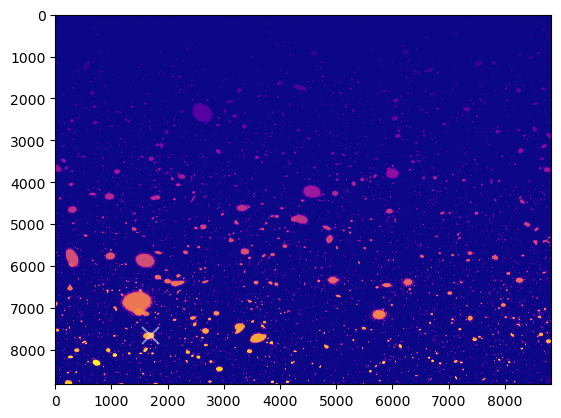

In [147]:
object_star = (section.iloc[-15]['x'], section.iloc[-15]['y'])
plt.imshow(dc2_seg_50_neg42[0].data, cmap='plasma', aspect='auto')
plt.scatter(object_star[1], object_star[0], s=150, c='white', marker='x', alpha=0.5)
object_star

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/shared/hsc/roman_lsst/3828_1,2_full_gal_star_cat.csv')

# Filter the DataFrame to include only stars
stars_df = df[df['truth_type'] == 2]

# Define the RA and Dec ranges and the number of bins
ra_min, ra_max = stars_df['ra'].min(), stars_df['ra'].max()
dec_min, dec_max = stars_df['dec'].min(), stars_df['dec'].max()
num_bins = 10

# Create bins for RA and Dec
ra_bins = np.linspace(ra_min, ra_max, num_bins + 1)
dec_bins = np.linspace(dec_min, dec_max, num_bins + 1)

# Digitize the RA and Dec values to find the bin indices
ra_indices = np.digitize(stars_df['ra'], ra_bins) - 1
dec_indices = np.digitize(stars_df['dec'], dec_bins) - 1

# Create a 2D histogram to count the number of stars in each bin
histogram, _, _ = np.histogram2d(stars_df['ra'], stars_df['dec'], bins=[ra_bins, dec_bins])

# Find the bin with the most stars
max_bin_index = np.unravel_index(np.argmax(histogram), histogram.shape)
max_bin_count = histogram[max_bin_index]

print(f"The bin with the most stars is at RA index {max_bin_index[0]} and Dec index {max_bin_index[1]} with {max_bin_count} stars.")


The bin with the most stars is at RA index 1 and Dec index 1 with 13.0 stars.


/tmp/ipykernel_2933766/747388447.py:4: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/shared/hsc/roman_lsst/3828_1,2_full_gal_star_cat.csv')


In [5]:
ra_range = (ra_bins[1], ra_bins[2])
dec_range = (dec_bins[1], dec_bins[2])

print(f"The exact RA range for the bin with the most stars is: {ra_range}")
print(f"The exact Dec range for the bin with the most stars is: {dec_range}")

The exact RA range for the bin with the most stars is: (57.09306969, 57.120713380000005)
The exact Dec range for the bin with the most stars is: (-36.75518339, -36.73302778)


In [ ]:
# ## Finding the out of range index
# value_to_highlight = 18909
# mask = seg_img_cutout == value_to_highlight
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# ax.imshow(seg_img_cutout, cmap='gray')
# ax.imshow(np.ma.masked_where(mask == False, mask), cmap='autumn', alpha=0.6)  # 'autumn' colormap with transparency